## Machine Learning CW2 - September 2022
### Comparing classifiers using the Iris Dataset
#### Classifiers: Naive Bayes, Random Forest, K-Nearest-Neighbour

In [327]:
# import the relevant libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
import statistics as stat

In [328]:
# load the iris dataset and print the description
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Exploratory Data Analysis (EDA)

In [329]:
# print the target names
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [330]:
# print the shape of the data and target variables
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [331]:
# bin count of target variables
np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

In [332]:
# create a dataframe with target features and species column
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = np.array([iris.target_names[i] for i in iris.target])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [333]:
# print descriptive statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [334]:
# print a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [335]:
# check for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

There are no null values in the dataset

In [336]:
# print the first five rows of the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [337]:
# print the value counts for the species
df.value_counts("species")

species
virginica     50
versicolor    50
setosa        50
dtype: int64

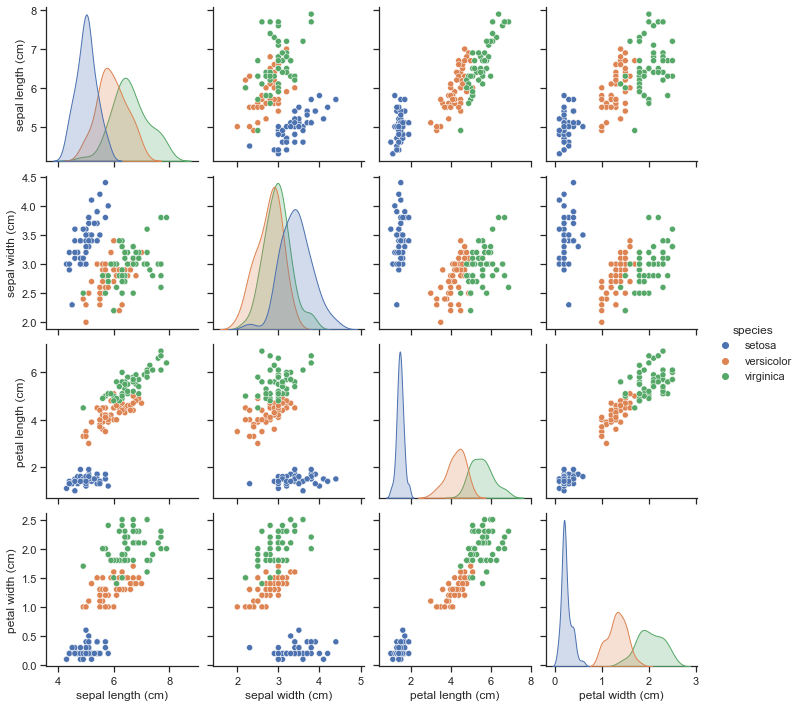

In [338]:
# print a seaborn pairplot
sns.set(style="ticks", color_codes=True) # change style
g = sns.pairplot(df, hue="species")

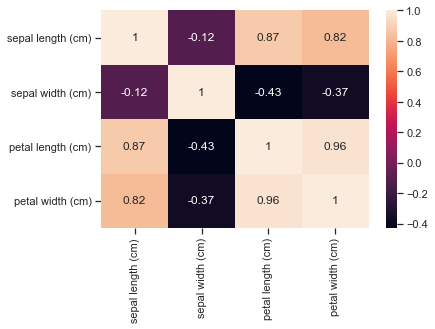

In [339]:
# print a seaborn heatmap to see the correlations between the variables
sns.heatmap(df.corr(), annot=True)
plt.show()

From the above heatmap, it can be seen that the features are highly correlated. 

<AxesSubplot:xlabel='sepal width (cm)'>

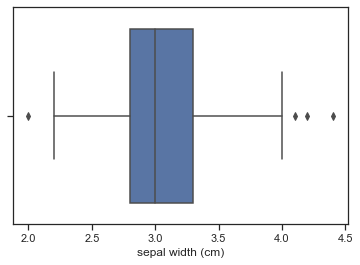

In [340]:
# print Seaborn box plots to see distribution of the data including outliers
# box plot: sepal width
sns.boxplot(x='sepal width (cm)', data=df)

<AxesSubplot:xlabel='sepal length (cm)'>

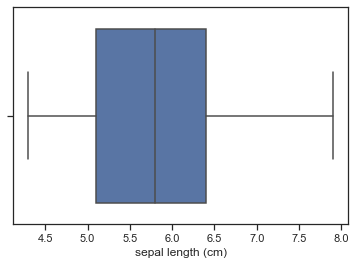

In [341]:
# box plot: sepal length
sns.boxplot(x='sepal length (cm)', data=df)

<AxesSubplot:xlabel='petal width (cm)'>

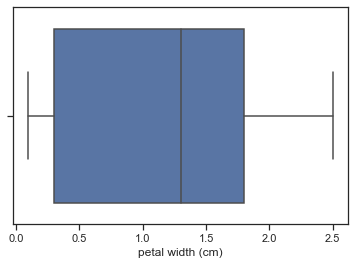

In [342]:
# box plot: petal width
sns.boxplot(x='petal width (cm)', data=df)

<AxesSubplot:xlabel='petal length (cm)'>

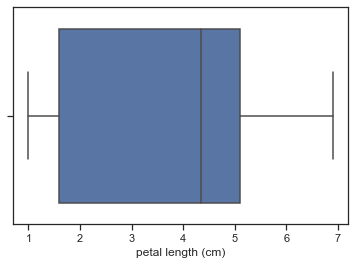

In [343]:
# box plot: petal length
sns.boxplot(x='petal length (cm)', data=df)

### Split the dataset

In [344]:
#Separating the dependent (y) and independent values (X).
X=df.iloc[:, :-1].values
y=df.iloc[:, -1].values

In [345]:
# print the independent values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [346]:
# print the dependent values
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [347]:
# train_test_split the dataset into X_train, X_test, y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [348]:
# X_train and y_train shape
X_train.shape, y_train.shape

((120, 4), (120,))

In [349]:
# X_test and y_test shape
X_test.shape, y_test.shape

((30, 4), (30,))

In [350]:
# Standardize the features by removing the mean and scaling to unit variance
# fit and transform the standard scaler to the X training and test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [351]:
# print the X_train array
X_train

array([[ 0.70202101,  0.13405605,  1.02897177,  0.84421264],
       [-0.73597366,  2.53505988, -1.25129808, -1.41588419],
       [-0.49630788,  0.8543572 , -1.25129808, -1.01704357],
       [ 1.30118546,  0.13405605,  0.80094479,  1.508947  ],
       [ 0.58218812, -1.30654625,  0.74393804,  0.97715951],
       [ 0.46235523, -0.34614472,  0.34489082,  0.17947828],
       [-0.85580655,  0.61425681, -1.13728459, -0.8840967 ],
       [-0.25664211, -0.10604434,  0.45890431,  0.44537202],
       [ 0.46235523, -2.0268474 ,  0.45890431,  0.44537202],
       [-1.21530522, -0.10604434, -1.30830483, -1.41588419],
       [-0.73597366,  1.09445758, -1.25129808, -1.28293731],
       [ 0.34252234, -1.06644587,  1.08597852,  0.31242515],
       [-0.13680922, -0.34614472,  0.28788407,  0.17947828],
       [ 1.66068413,  0.37415643,  1.3140055 ,  0.84421264],
       [ 0.8218539 ,  0.37415643,  0.80094479,  1.11010638],
       [ 1.66068413,  1.33455796,  1.37101225,  1.77484074],
       [-0.85580655,  0.

### 1.1 Naïve Bayes Classifier
Train a naïve bayes classifier in python

In [352]:
# use GaussianNB() to fit the Naive Bayes classifier to the training data
nbclassifier = GaussianNB()
nbclassifier.fit(X_train, y_train)

GaussianNB()

In [353]:
# Predicting the Test set results
y_pred_nb = nbclassifier.predict(X_test)
print(y_pred_nb)

['versicolor' 'versicolor' 'setosa' 'virginica' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica'
 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor' 'virginica']


In [354]:
# print a confusion matrix for the test and predicted data
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)
acc_nb = accuracy_score(y_test,y_pred_nb)
print('Confusion matrix for Naive Bayes \n',cm_nb)
print('Classification Report:\n', classification_report(y_test, y_pred_nb))

[[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]
Confusion matrix for Naive Bayes 
 [[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



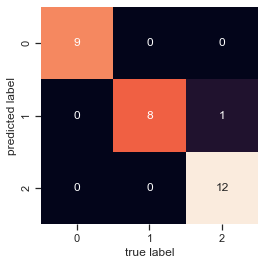

In [355]:
# print a Seaborn heatmap
sns.heatmap(cm_nb.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### 1.2 Random Forst Classifier
Train a random forest classifier in python. Use your code to fit the data given above.

Evaluate feature performance of the model.

Visualise the feature importance. 

In [356]:
# use RandomForestClassifier with random state = 13 to replicate results
rf = RandomForestClassifier(n_estimators=10000, random_state=13, n_jobs=-1)

In [357]:
# fit the data
rf.fit(iris.data, iris.target_names[iris.target])

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=13)

In [358]:
# fit the classifier to training data
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=13)

In [359]:
# print the predicted data from the X_test data
print(rf.predict(X_test))

['versicolor' 'versicolor' 'setosa' 'virginica' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica'
 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor' 'virginica']


In [360]:
# print the y_test data
print(y_test)

['versicolor' 'versicolor' 'setosa' 'virginica' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica'
 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor' 'virginica']


### Identify and select the most important features

In [361]:
# feature_importances identify the features in descending order of importance
import pandas as pd
feature_imp = pd.Series(rf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.440700
petal length (cm)    0.432017
sepal length (cm)    0.103975
sepal width (cm)     0.023308
dtype: float64

In [365]:
# use SelectFromModelto get feature importance with a threshold
sfm = SelectFromModel(rf, threshold=0.15) # features of importance >0.15

In [366]:
# train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                                 random_state=13),
                threshold=0.15)

In [367]:
# list of features to use in the SelectFromModel() 
features = ['Sepal Length','Sepal Width','Petal Length','Petal Width']

In [368]:
# Print the names of the most important features
for x in sfm.get_support(indices=True):
    print(features[x])

Petal Length
Petal Width


### Subset the data with only the most important features

In [369]:
# apply the transform() function to the X_train and X_test data
X_importance_train = sfm.transform(X_train)
X_importance_test = sfm.transform(X_test)

### Train a Random Forest Classifier using the most important features

In [370]:
# create classifier : 2-feature model
rf_importance = RandomForestClassifier(n_estimators=10000, random_state = 13, n_jobs=-1)
# fit the model
rf_importance.fit(X_importance_train,y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=13)

### Compare accuracy between the two

In [371]:
# apply to the 4-feature test data
y_pred = rf.predict(X_test)
# view the accuracy of the 4-feature model
accuracy_score(y_test, y_pred)

0.9333333333333333

In [372]:
# another method of getting the accuracy score
print(rf.score(X_test, y_test))

0.9333333333333333


In [374]:
# apply to the 2-feature test data
y_importance_pred = rf_importance.predict(X_importance_test)
# view the accuracy of the 2-feature model
rf_acc_importance = accuracy_score(y_test, y_importance_pred)
rf_acc_importance

1.0

In [375]:
# using the other method for accuracy
print(rf_importance.score(X_importance_test, y_importance_pred))

1.0


### Tune the model

In [376]:
# Tuning parameters
rf_params = {'max_samples': [0.1, 0.2, 0.3, 0.4],
                'max_features': [1, 2],
                'n_estimators':[10, 50, 100],
                'max_depth': [8, 9, 10]
                }
# KFold cross validation split
rf_cv = KFold(n_splits=5)

In [377]:
# 4-feature model
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_params, cv=rf_cv)
# fit the grid to the 4-feature model
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                              random_state=13),
             param_grid={'max_depth': [8, 9, 10], 'max_features': [1, 2],
                         'max_samples': [0.1, 0.2, 0.3, 0.4],
                         'n_estimators': [10, 50, 100]})

In [378]:
# 4-feature model accuracy score after tuning
acc_rf_grid = rf_grid.score(X_test, y_test)
acc_rf_grid

0.9333333333333333

In [379]:
# print the best parameters and score from 4-feature model
print('RF best Parameters:', rf_grid.best_estimator_)
print('RF best Score:', rf_grid.best_score_)

RF best Parameters: RandomForestClassifier(max_depth=8, max_features=1, max_samples=0.4,
                       n_estimators=50, n_jobs=-1, random_state=13)
RF best Score: 0.9583333333333333


In [380]:
# GridSearchCV 2-feature importance model
rf_importance_grid = GridSearchCV(estimator=rf, param_grid=rf_params, cv=rf_cv)
# fit the tuned grid to the 2-feature model
rf_importance_grid.fit(X_importance_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                              random_state=13),
             param_grid={'max_depth': [8, 9, 10], 'max_features': [1, 2],
                         'max_samples': [0.1, 0.2, 0.3, 0.4],
                         'n_estimators': [10, 50, 100]})

In [381]:
# 2-feature importance model accuracy score after tuning
acc_rf_importance_grid = rf_importance_grid.score(X_importance_test, y_test)
acc_rf_importance_grid

0.9666666666666667

In [382]:
# Print the best parameters and score from the 2-feature model
print('RF best Parameters:', rf_importance_grid.best_estimator_)
print('RF best Score:', rf_importance_grid.best_score_)

RF best Parameters: RandomForestClassifier(max_depth=8, max_features=2, max_samples=0.2,
                       n_estimators=50, n_jobs=-1, random_state=13)
RF best Score: 0.9583333333333334


In [383]:
# predict using X_test and print the confusion matrix (y_test, y_pred)
y_pred = rf_grid.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred)
acc_rf = accuracy_score(y_test,y_pred)
print('Confusion matrix for Random Forest\n',cm_rf)
print('Classification Report:\n', classification_report(y_test, y_pred))

Confusion matrix for Random Forest
 [[ 9  0  0]
 [ 0  8  0]
 [ 0  2 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.80      1.00      0.89         8
   virginica       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



In [384]:
# predict using test data from the 2-feature model
# print the confusion matrix and classification report
y_importance_pred= rf_importance_grid.predict(X_important_test)
cm_rf_importance = confusion_matrix(y_test, y_importance_pred)
acc_rf_importance = accuracy_score(y_test,y_importance_pred)
print('Confusion matrix for Random Forest\n',cm_rf_importance)
print('Classification Report:\n', classification_report(y_test, y_importance_pred))

Confusion matrix for Random Forest
 [[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



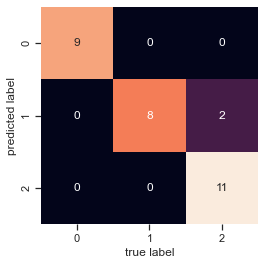

In [385]:
# print the 4-feature model heatmap
sns.heatmap(cm_rf.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

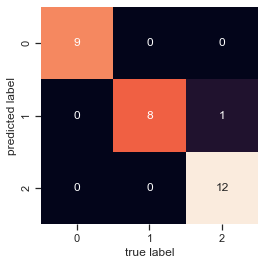

In [386]:
# 2-feature model heatmap
sns.heatmap(cm_rf_important.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### 1.3 kNN Classifier
Train a kNN classifier in python.

Use your code to fit the data given above.

In [387]:
# define and fit the KNeighborsClassifier() with n_neighbors=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [388]:
# predict using X_test
y_pred_knn = knn.predict(X_test)

In [389]:
# print the accuracy score, round to 3 
acc_knn = round(metrics.accuracy_score(y_test,y_pred_knn),3)
print(acc_knn)

0.967


In [390]:
# Find the optimim value of k
k_range  = range(3,30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    acc_knn = round(metrics.accuracy_score(y_test,y_pred_knn),3)
    scores.append(acc_knn)

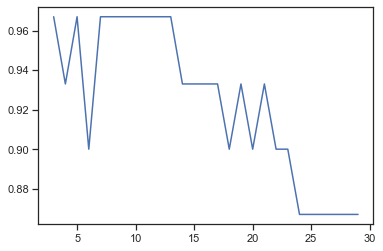

In [391]:
#plotting accuracy vs k-value plot
plt.plot(k_range,scores)

In [392]:
# Apply K Nearest Neighbor for k=9
from sklearn.neighbors import KNeighborsClassifier
knn_9 = KNeighborsClassifier(n_neighbors=9)
knn_9.fit(X_train, y_train)
y_pred_knn = knn_9.predict(X_test)

In [393]:
# Calculate KNN accuracy 
acc_knn = round(metrics.accuracy_score(y_test,y_pred_knn),3)
print('KNN Accuracy: '+ str(round(acc_knn,3)))

KNN Accuracy: 0.967


In [394]:
# print the confusion matrix and classification report for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test,y_pred_knn)
print('Confusion matrix for KNN\n',cm_knn)
print('Classification Report:\n', classification_report(y_test, y_pred_knn))

Confusion matrix for KNN
 [[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [395]:
# cross tabulation predicted vs actual results
print(pd.crosstab(y_test, y_pred_knn, 
                  rownames=['Actual'], 
                  colnames=['Predicted'], 
                  margins=True, 
                  margins_name='total'))

Predicted   setosa  versicolor  virginica  total
Actual                                          
setosa           9           0          0      9
versicolor       0           8          0      8
virginica        0           1         12     13
total            9           9         12     30


In [396]:
# check the cross validation score for knn_9
var="%"
print("Accuracy: %0.1f" % (knn_9.score(X_test,y_test)*100), var[0])
scores_knn = cross_val_score(knn_9, df.drop('species',axis=1), df.species, cv=10, scoring='accuracy')
scores_knn

Accuracy: 96.7 %


array([1.        , 0.93333333, 1.        , 1.        , 1.        ,
       0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])

With the cross validation CV=10, the performance of the KNN algorithm can vary from 93% to 100%

In [397]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(3,31))
param_grid_knn = dict(n_neighbors= k_range)
grid_knn = GridSearchCV(knn_9, k_values, cv=10, scoring='accuracy',
                       return_train_score = False, verbose=1)
grid_search_knn = grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.3s finished


In [398]:
print(grid_search_knn.best_params_)

{'n_neighbors': 9}


In [399]:
acc_knn = grid_search_knn.best_score_
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(acc_knn) )

Accuracy for our training dataset with tuning is : 0.97%


### Find the best Model

In [401]:
# find the best model by summarizing the accuaracy scores in descending order
import pandas as pd
results = pd.DataFrame({'Model': ['Naive Bayes','Random Forest 4-feature',
                                  'Random Forest 2-feature',
                                  'Random Forest 4-feature tuned',
                                  'Random Forest 2-feature tuned','KNN'],
    'Accuracy_score': [acc_knn, acc_rf, rf_acc_importance,
                       acc_rf_grid, acc_rf_importance_grid, acc_nb]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Accuracy_score
0,Random Forest 2-feature,1.000000
1,Random Forest 2-feature tuned,0.966667
2,KNN,0.966667
3,Naive Bayes,0.966667
4,Random Forest 4-feature,0.933333
5,Random Forest 4-feature tuned,0.933333


## 2 Code Report [6 marks total]

The code for the machine learning project includes the following key points:

**1. Load the required libraries:**

pandas, numpy, matplotlib, statistics, seaborn and various sklearn libraries for the machine learning.

**2. Load the dataset and print a description:**

iris dataset

**3. Data visualization:**

a. Summary of target names: use target_names, data shape: use shape option and bincount (use np.bincount)

b. Describe the dataset for the descriptive statistics to summarize the central tendency, dispersion and shape of the dataset: count, mean, std min, 25%, 50%, 75% and max for the target names sepal length, sepal width, petal length and petal width.

c. Check for null values

d. Get the value_counts of the species virginica, versicolor and setosa.

e. Print a Seaborn pairplot for the three species.

f. Print a Seaborn heatmap comparing the targets sepal length, sepal width, petal length and petal width.

g. Print Seaboorn boxplots for the targets to see outliers.

**4. Split the dataset:**

Separate the dependent (y) and independent variables (X).

train_test_split X,y into X_train, X_test, y_test and y_test.

**5. Standardize the features:**

Use sklearn StandardScaler() to fit (X_train) and transform (X_test).

**6. Train the classifiers:**

classifiers: Naive Bayes, Random Forest, K-Nearest-Neighbour.

train and fit the algorithms to the training data.

Evaluate the trained algorithm.

Print confusion matrices and classification reports.

Print Seaborn heatmaps.

**For Random Forest classifier:**

a. Identify and select the most important features using feature_importances_.

b. Use SelectFromModel() to get feature importance with a threshold > 0.15
Subset the data with only the most important features.

c. Train the Random Forest classifier using the most important features (2-feature model).

d. Compare the accuracy between the 4-feature and 2-feature models
Tune the models.

e. Use a KFold (5 folds) cross valudation split.

f. Get the best parameters using GridSearchCV().

**For KNN:**

find the optimal value for k and apply (k=9)

Two methods in sklearn were used to find the optimal value of k:

a. GridSearchCV()

b. Using metrics.accuracy_score


**7. Find the best model:**

print the 6 models in descending order of accuracy score.


## 3 Model Questions [14 marks total]

Please answer the following questions relating to your classifiers.

### 3.1 Naïves Bayes Questions [4]

**Why do zero probabilities in our Naïve Bayes model cause problems?**

The Naïve Bayes classifier assigns a zero probability to samples from a categorical variable that don't appear in the training data. This is known as 'zero frequency'. In any dataset, particularly small datasets, there is the probability of an event not occuring, it's observed frequency is zero, implying a zero probability. 

**How can we avoid the problem of zero probabilities in our Naïve Bayes model?**

This zero frequency can be avoided by using smoothing techniques, for example Laplace estimation, this technique is also known as 'additive smoothing' or 'Lidstone smoothing', or 'add-one smoothing'. Pierre-Simon, marquis de Laplace, born in Normandy in 1749 and died in 1827 in Paris, was a French scholar and polymath led to the development of engineering, mathematics, statistics, physics, astronomy, and philosophy.
By adjusting artificially the probability of the rare (but not impossible) event of a zero probability, the problem can be avoided.  
The add-one method adds one to each observed number of events, including the zero-count possibilities.  This is called Laplace's Rule of Succession.

### 3.2 Random Forest Questions [6]

**Which feature is the most important from your random forest classifier?**

The scores from the feature importance indicate that Petal length and Petal width are much more important than Sepal length and Sepal width. The combination of petal length + petal width is 0.896.

**Can any features be removed to increase accuracy of the model, if so which features? **

Yes, the Sepal length and Sepal width can be removed and the data can be subset using the SelectFromModel library in sklearn.feature_selection

**Explain why it would be useful to remove these features.**

Although the Random Forest algorithm has built-in feature selection meaning it isn't necessary to remove irrelevant features, the removal of unnecesary features will improve the performance and the accuracy of the model, especially if they are highly correlated. Having a lot of irrelevant features will serve as noise and reduce performance. Once removed, the 2-feature model improved to 100% accuracy.


### 3.3 kNN Questions [4]
**Do you think the kNN classifier is best suited to the iris dataset?** 

Yes the KNN classifier is suited to the Iris dataset. 

It doesn't suffer from the problem of zero probability like the Naive Bayes does. 

Its an easier algorithm to use compared to Naive Bayes, which would need to have a Laplacian estimator in the even of zero probability problems.  

KNN doesn't require any training either.

**What ideal qualities would the most appropriate dataset display?**

The dataset can contain outliers.

Data can be continuous, categorical, discrete, ordinal, and numerical or a combination of any.

When aggregating, data must be the arithmetic mean, median and mode for numeric variables and the mode must be used for categorical data.

The dataset can contain missing data because KNN can approximate the values of the points closest, based on other variables.

Data should be normalized before applying KNN.

Data should be smaller than 100000 records.

Data should be labelled with no noise.

## 4 Comparing Models [18 marks total]


### 4.1 Compare each model [3]

**What differences do you see between your Naïve Bayes classifier, your random forest classifier, and your kNN classifier?** 

**1. Simplicity**

Random Forest is a simple algorithm and often outperforms both Naive Bayes and KNN, it's also the easist to explain and understand. Random Forest can work directly from a dataset without having to pre-process it. Naive Bayes has complicated maths. 

**2. Overfitting**

Over-fitting is a problem with decisions trees, but technically Random Forest can avoid over-fitting, but this process is a trade-off in terms of simplicity, it will make it more complex, in addition, the more branches added to a tree,the more the chance of overfitting.

**3. Decision boundary**

Naive Bayes will work if the decision boundary is linear, elliptic or parabolic.  KNN is best for anything other than these types of decision boundaries. Unlike KNN, Naive Bayes is a linear classifier

**4. Training required**

KNN requires no training, unlike Naive Bayes and Random Forest algorithms. 

**5. Performance**

Naive Bayes outperforms Random Forest, especially where robotics and computer vision is concerned. Naive Bayes is extremely accurate with big data.  The error rate for KNN decreases as the value of k increases.  

**6. Speed**

Calculations in KNN are slower for large amounts of data, whereas Naive Bayes is much quicker due to less calculations required.

### 4.2 Accuracy [6]
**Can you explain why there are differences in accuracy between the three classifiers?**

The most accurate model was the 2-feature Random Forest model at 100%. All models, except the 2-feature Random Forest model and the 4-feature tuned Random Forest model had the same accuracy after changing the k-value and GridsearchCV() in the case of the KNN algorithm and removing irrelevant features with Random Forest.  Accuracy in the final models (other than the 2-feature Random Forest model) was 0.9666667. 

The original 4-feature Random Forest model together with its tuned version had an accuracy of 0.933333 before removal of the features. 

Tuning the Random Forest model didn't make much difference to accuracy, it actually decreased it in the case of the 4-feature one.  The process of choosing the most important features increased the accuracy more than tuning did. Accuracy increased to 0.958333 when using the best_esimator_ and best_score_ functions.  Once the two features, sepal width and sepal length were removed, accuracy increased to 0.9666667. 

In the KNN model, n_neighbors = 3 produced an accuracy of 0.967, With cross validation, the KNN model was capable of fluctuations of between 93% up to 100%. The best parameters for n_neighbors was k=9.

### 4.3 Appropriate Use [9]
**When would it be appropriate to use each different classifier?**

The KNN algorithm works better for small datasets of less than 100000 records, these would be labelled datasets with no noise. KNN is mostly used for classification, it classifies data in relation to how a neighbouring dataset is classified. An odd number of K is generally a better than an even one as this avoids confusion between 2 classes. KNN has low bias but high variance

Random Forest algorithm can be used for classification and regression problems.  It provides very high accuracy and can handle missing values. It works well for large and small datasets. It can handle large data sets with high dimensionality. It can also handle collinearity in features and is not influenced by outliers. If you don't need to understand the relationship that features have with the target and the degree of influence they have, then Random Forest is a good algorithm to use. 

Naive Bayes algorithm is used for supervised classification.  The presence of any other feature. It works well on large datasets.  It works well with text data and is often used in spam filtering. It is often used with categorical features and less so with numerical features.

Reference real-world situations and examples of specific data sets and explain why that classifier would be most appropriate for that use-case.

A diabetes dataset would work well with KNN - predicting if someone has diabetes or not, either 0 or 1, never NaN or -1.

Random Forest can be applied in the real world to fraud detection for bank accounts and credit cards, for detecting and predicting drug sensitivity of a medicine, for identifying a patient's disease from analyzing their medical records, also for predicting estimated profit or loss while purchasing a particular stock.

Naive Bayes also work in sentiment analysis, so social media analysis to identify positive and negative customer sentiments. Another application is for recommendation systems, such as for products, movies and songs. It works well for prediction forecasts like will it rain or not. This is achieved easily due to the simplicity of the algorithm. 

## Bibliography:

https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637

https://www.datasciencecentral.com/comparing-classifiers-decision-trees-knn-naive-bayes/

https://github.com/dataprofessor/code/blob/master/python/iris/iris-classification-random-forest.ipynb

https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/

https://www.linkedin.com/pulse/using-machine-learning-knn-k-nearest-neighbors-solve-mendes-msc

https://setscholars.net/wp-content/uploads/2019/08/Compare-Algorithms-with-iris-dataset.html

https://github.com/dataprofessor/code/blob/master/python/iris/iris-classification-random-forest.ipynb

https://www.ritchieng.com/machine-learning-evaluate-classification-model/

https://chrisalbon.com/code/machine_learning/trees_and_forests/feature_selection_using_random_forest/

https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv

https://www.kaggle.com/general/208443

https://blog.paperspace.com/introduction-to-naive-bayes/

https://github.com/akash18rwt/KNN-Models-on-IRIS-Dataset/blob/master/knn_model.ipynb
